<a href="https://colab.research.google.com/github/le-shammer/IMDBRateSeries/blob/master/imdb_ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install imdbpy
import pandas as pd
import sys
from imdb import IMDb
from matplotlib.pyplot import plot

     |████████████████████████████████| 296kB 2.7MB/s 


In [ ]:
def getEpisodesForSeries(seriesID, ia, seasons = None):
  seriesObject = ia.get_movie(seriesID)
  ia.update(seriesObject, 'episodes')
  if seasons is None:
    seasons = sorted(seriesObject['episodes'].keys())
  return seriesObject

def createPlotDF(episodeList):
  df = pd.DataFrame(columns = ["episode", "season", "rating", "title"])
  visualizeMe = {}
  ratings = []
  episodeNumbers = []
  seasonlengths = []
  i = 0
  for season in sorted(episodeList['episodes'].keys()):
    seasonlengths.append(i)
    #print("Season ", season)
    for episode in sorted(episodeList['episodes'][season].keys()):
      try:
        rating = episodeList['episodes'][season][episode]['rating']
        ratings.append(rating)
        episodeNumbers.append("".join(["S", str(season), "E", str(episode).zfill(2)]))
        newRow = {"episode": episode, "season": season , "rating": rating, "title":episodeList['episodes'][season][episode]}
        df = df.append(newRow, ignore_index = True)
        i += 1
      except KeyError:
        print("No rating yet!")
  visualizeMe = {
      "episodeNumbers": episodeNumbers,
      "ratings" : ratings,
      "seasonLengths" : seasonlengths,
      "allEpisodes" : df
  }
  return visualizeMe

def findMovieIDForTitle(seriesTitle, ia):
  searchHits = ia.search_movie(seriesTitle)
  for hit in range (0, len(searchHits)):
    if searchHits[hit]['kind'].lower() == 'tv series':
      break
    if hit == len(searchHits)- 1:
      sys.exit('No tv series found with this name')
  return searchHits[0].movieID
  
    
def visualizeSeasonsOfSeries(seriesTitle):
  ia = IMDb()
  seriesID = findMovieIDForTitle(seriesTitle, ia)
  episodeList = getEpisodesForSeries(seriesID, ia)
  df = createPlotDF(episodeList)
  episodesRatings = pd.DataFrame(index = df['episodeNumbers'], columns = ['ratings'])
  episodesRatings.ratings = df['ratings']
  ax = episodesRatings.plot(figsize=[25, 10])
  for seasonLength in df['seasonLengths']:
    ax.axvline(seasonLength, color="red", linestyle="--")
  #print(df)
  return df["allEpisodes"]

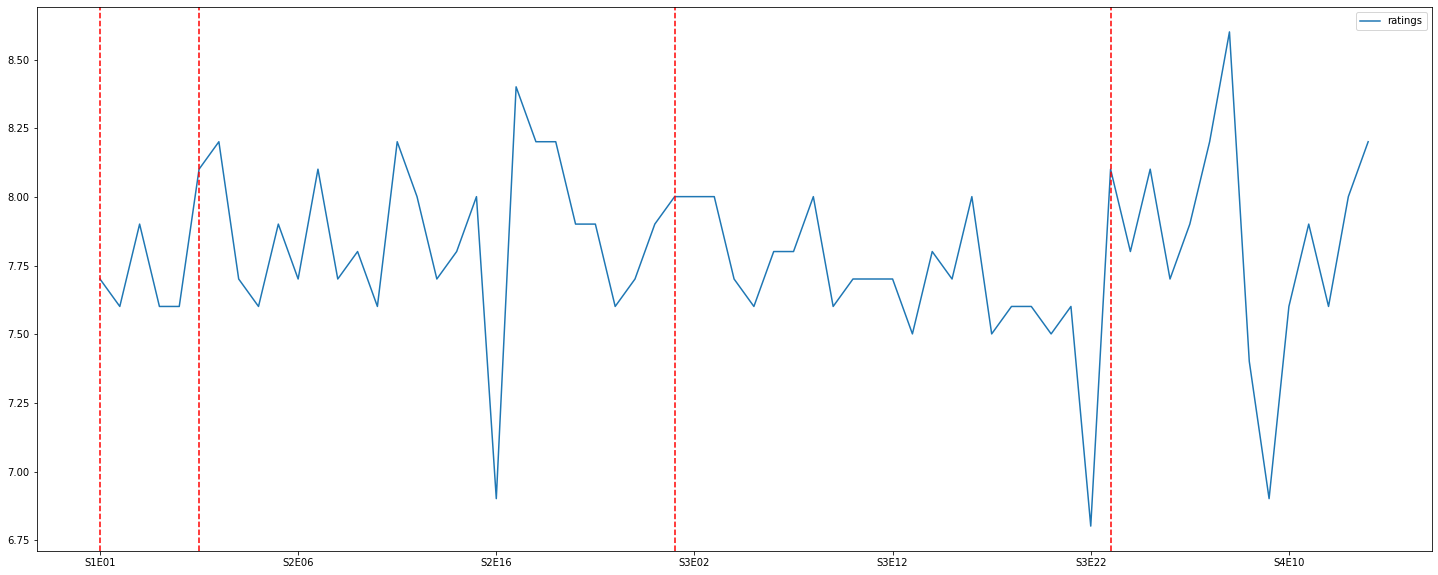

In [ ]:
df = visualizeSeasonsOfSeries('Dinosaurs')

In [ ]:
df.loc[df.rating == min(df.rating),:]

KeyError: ignored

KeyError: ignored

In [ ]:
df

KeyError: ignored

KeyError: ignored